In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.array([0,10, 33, 100, 333, 1000])
y = np.array([15, 16, 16, 27, 33, 20, 21, 18, 26, 41, 38, 27, 29, 21, 33, 60, 41, 42]).reshape(6,3, order='F')

In [47]:
y*np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]).reshape(6,3, order='F')

array([[ 15, 147, 377],
       [ 32, 144, 294],
       [ 48, 234, 495],
       [108, 410, 960],
       [165, 418, 697],
       [120, 324, 756]])

In [84]:
def gibbs(x, y, nchain, init_abgt, sd_prop):
    chain_alpha = np.zeros((nchain+1, 1))
    chain_alpha[0] = init_abgt[0]
    chain_beta = np.zeros((nchain+1, 1))
    chain_beta[0] = init_abgt[1]
    chain_gamma = np.zeros((nchain+1,1))
    chain_gamma[0] = init_abgt[2]
    chain_tau = np.zeros((nchain+1,1))
    chain_tau[0] = init_abgt[3]
    
    mu_candidate = np.zeros((6,3))
    mu = np.zeros((6,3))
    
    # Hyperparamètres 
    a = 1/1000
    b = 1/1000
    sigma = 100000
    
    for i in range(nchain):
        # MAJ tau
        # Lambda
        l = np.random.normal(0, 1/chain_tau[i], size=6*3).reshape(6,3)
        # tau
        chain_tau[i+1] = np.random.gamma(a + (1/2)*3*6, 1/(b) + (1/2*((l**2)).sum()))
        
        # Utile pour la MAJ de alpha beta et gamma
        l = np.random.normal(0, 1/chain_tau[i+1], size=6*3).reshape(6,3)
        
        # MAJ alpha par MH
        alpha_candidate = np.random.normal(chain_alpha[i], sd_prop[0])
        for I in range (6):
            for J in range(3):
                mu_candidate[I,J] = np.exp(alpha_candidate + chain_beta[i]*np.log(x[I]+10) + chain_gamma[i]*x[I] + l[I,J])
                mu[I,J] = np.exp(chain_alpha[i] + chain_beta[i]*np.log(x[I]+10) + chain_gamma[i]*x[I] + l[I,J])
        
        top = (alpha_candidate**2)/(2*sigma) + (mu_candidate- y*np.log(mu_candidate)).sum()
        bottom = (chain_alpha[i]**2)/(2*sigma) + (mu - y*np.log(mu)).sum()
        ratio = top - bottom
        
        u = np.log(np.random.uniform())
        
        if (u < ratio):
            chain_alpha[i+1] = alpha_candidate
        else : 
            chain_alpha[i+1] = chain_alpha[i]
            
            
        # MAJ beta par MH 
        beta_candidate = np.random.normal(chain_beta[i], sd_prop[1])
        for I in range(6):
            for J in range(3):
                mu_candidate[I,J] = np.exp(chain_alpha[i+1] + beta_candidate*np.log(x[I]+10) + chain_gamma[i]*x[I] + l[I,J])
                mu[I,J] = np.exp(chain_alpha[i+1] + chain_beta[i]*np.log(x[I]+10) + chain_gamma[i]*x[I] + l[I,J])
                
        top = (beta_candidate**2)/(2*sigma) + (mu_candidate - y*np.log(mu_candidate)).sum()
        bottom = (chain_beta[i]**2)/(2*sigma) + (mu - y*np.log(mu)).sum()
        ratio = top-bottom
        
        u = np.log(np.random.uniform())
        
        if (u < ratio):
            chain_beta[i+1] = beta_candidate
        else:
            chain_beta[i+1] = chain_beta[i]
        
        # MAJ gamma par MH 
        gamma_candidate = np.random.normal(chain_gamma[i], sd_prop[2])
        for I in range(6):
            for J in range(3):
                mu_candidate[I,J] = np.exp(chain_alpha[i+1] + chain_beta[i+1]*np.log(x[I]+10) + gamma_candidate*x[I] + l[I,J])
                mu[I,J] = np.exp(chain_alpha[i+1] + chain_beta[i+1]*np.log(x[I]+10) + chain_gamma[i]*x[I] + l[I,J])
                
        top = (gamma_candidate**2)/(2*sigma) + (mu_candidate - y*np.log(mu_candidate)).sum()
        bottom = (chain_gamma[i]**2)/(2*sigma) + (mu - y*np.log(mu)).sum()
        ratio = top-bottom
        
        u = np.log(np.random.uniform())
        
        if (u < ratio):
            chain_gamma[i+1] = gamma_candidate
        else:
            chain_gamma[i+1] = chain_gamma[i]
        
        
        
        
    return(chain_tau, chain_alpha, chain_beta, chain_gamma)

In [85]:
tau, alpha, beta, gamma = gibbs(x,y,10000,np.array([0.5,0.5,0.5,1]),np.array([0.3,0.05,0.2]))

/var/folders/44/m2grdsw162ld66b4rw5qzxdr0000gn/T/ipykernel_23313/502006511.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu_candidate[I,J] = np.exp(alpha_candidate + chain_beta[i]*np.log(x[I]+10) + chain_gamma[i]*x[I] + l[I,J])
/var/folders/44/m2grdsw162ld66b4rw5qzxdr0000gn/T/ipykernel_23313/502006511.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu[I,J] = np.exp(chain_alpha[i] + chain_beta[i]*np.log(x[I]+10) + chain_gamma[i]*x[I] + l[I,J])
/var/folders/44/m2grdsw162ld66b4rw5qzxdr0000gn/T/ipykernel_23313/502006511.py:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in fut

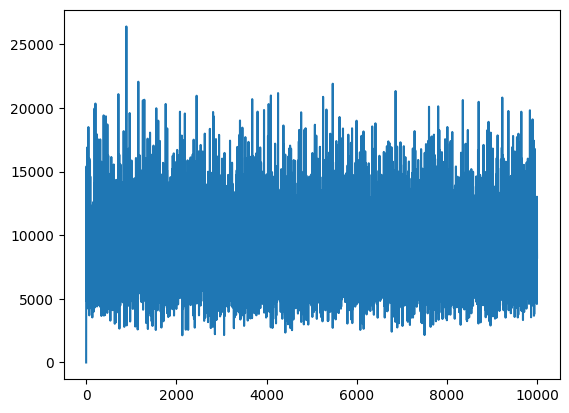

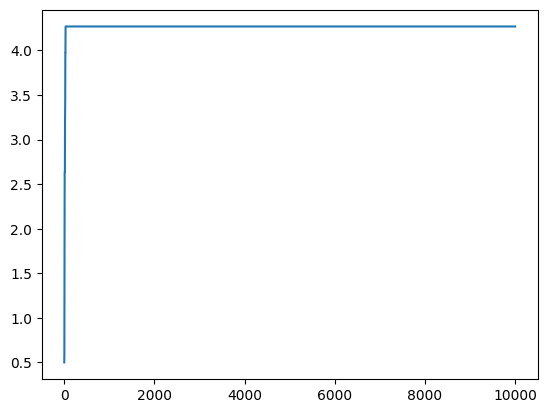

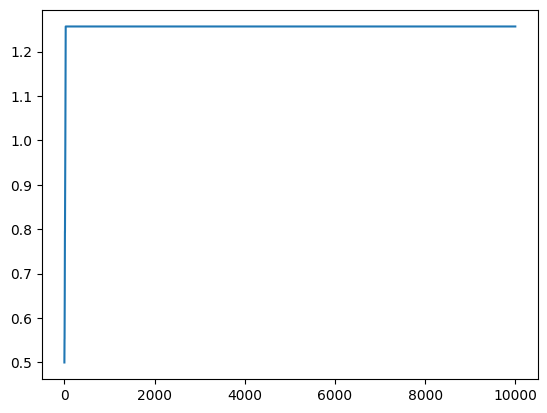

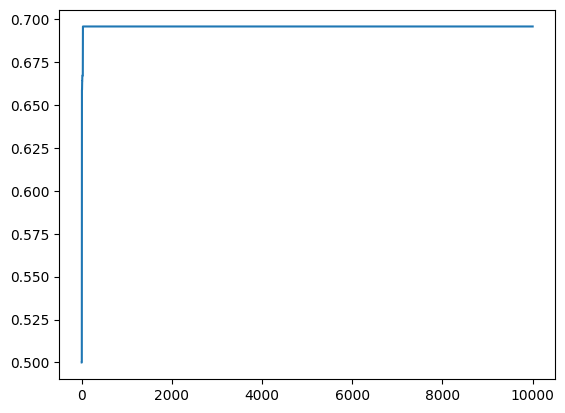

In [79]:
plt.plot(tau)
plt.show()
plt.plot(alpha)
plt.show()
plt.plot(beta)
plt.show()
plt.plot(gamma)
plt.show()

In [64]:
truc = np.random.normal(0,1, size=6*3).reshape(6,3)

In [65]:
truc[1,1]

2.750025920165433

In [62]:
truc = y*np.random.normal(0,1, size=6*3).reshape(6,3)

In [63]:
truc[1,2]

7.65589164563126

In [66]:
mu_candidate = np.zeros((6,3))
mu_candidate[1,2]

0.0